In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input/airline-passenger-satisfaction'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airline-passenger-satisfaction/train.csv
/kaggle/input/airline-passenger-satisfaction/test.csv


In [2]:
# Veri dosyasını oku
df = pd.read_csv('/kaggle/input/airline-passenger-satisfaction/train.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


# Statistical Summary

In [7]:
# Numeric verilerin ortalaması:

print("Flight Distance ortalaması:", df['Flight Distance'].mean())
print("Age ortalaması:", df['Age'].mean())


Flight Distance ortalaması: 1189.4483754234677
Age ortalaması: 39.379706267323684


In [32]:
# Verilerin standart sapmaları min ve max değerleri
print("Flight Distance verilerin medyanı:" ,df['Flight Distance'].median())
print("Cleanliness verilerin ortalaması:", df['Cleanliness'].mean())

print("Departure Delay", df['Departure Delay in Minutes'].max())

print("Age", df['Age'].max())
print("Age", df['Age'].min())


Flight Distance verilerin medyanı: 843.0
Cleanliness verilerin ortalaması: 3.2863508623344626
Departure Delay 1592
Age 85
Age 7


# Missing Value Analysis


In [15]:
# Eksik değerlerin toplam sayısı
print(df.isnull().sum())

# Eksik değer olan sütun sayısı
print("Eksik değer içeren sütun sayısı:", df.isnull().sum().astype(bool).sum())


Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

In [18]:
# Eksik değer içeren sütunu ortalama ile doldurduk
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())


In [20]:
#eksik değer içeren verilerin olup olmadığını kontrol ettim
print("Eksik değer içeren sütun sayısı:", df.isnull().sum().astype(bool).sum())

Eksik değer içeren sütun sayısı: 0


# Aykırı Değer (Outlier) Analizi


In [26]:
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    oran = 100 * len(outliers) / len(df)
    print(f"{col}: {oran:.2f}% aykırı değer içeriyor")


Age: 0.00% aykırı değer içeriyor
Flight Distance: 2.20% aykırı değer içeriyor
Inflight wifi service: 0.00% aykırı değer içeriyor
Departure/Arrival time convenient: 0.00% aykırı değer içeriyor
Ease of Online booking: 0.00% aykırı değer içeriyor
Gate location: 0.00% aykırı değer içeriyor
Food and drink: 0.00% aykırı değer içeriyor
Online boarding: 0.00% aykırı değer içeriyor
Seat comfort: 0.00% aykırı değer içeriyor
Inflight entertainment: 0.00% aykırı değer içeriyor
On-board service: 0.00% aykırı değer içeriyor
Leg room service: 0.00% aykırı değer içeriyor
Baggage handling: 0.00% aykırı değer içeriyor
Checkin service: 12.41% aykırı değer içeriyor
Inflight service: 0.00% aykırı değer içeriyor
Cleanliness: 0.00% aykırı değer içeriyor
Departure Delay in Minutes: 13.98% aykırı değer içeriyor
Arrival Delay in Minutes: 13.43% aykırı değer içeriyor


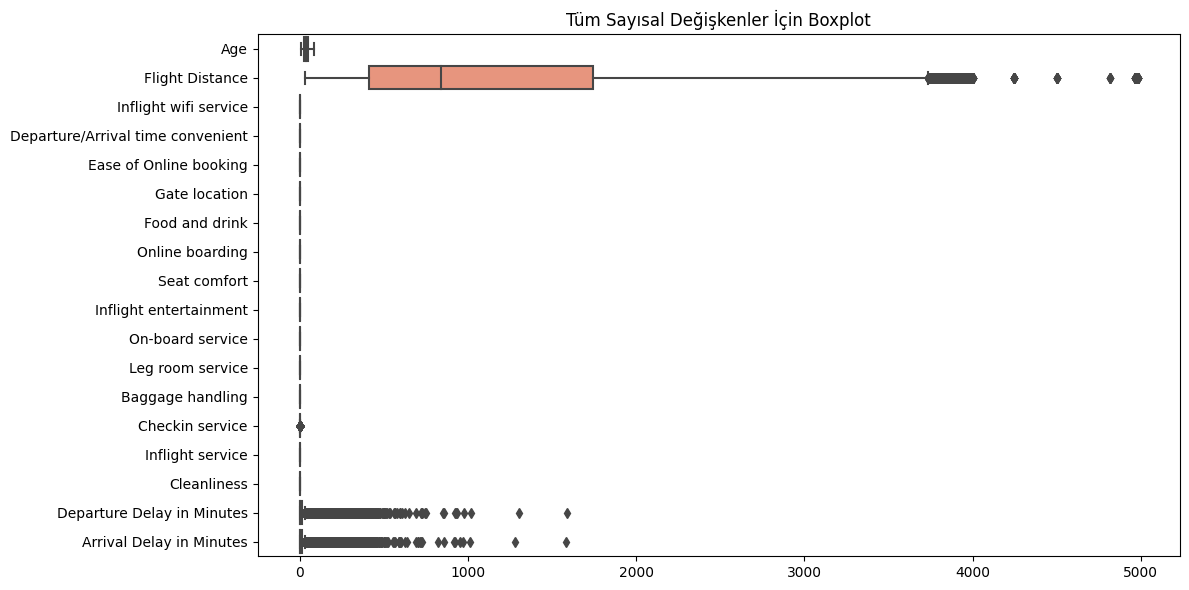

In [25]:
# Boxplot ile aykırı değer inceleme

import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = df.select_dtypes(include='number').columns
numerical_cols = numerical_cols.drop(['id', 'Unnamed: 0'])


plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numerical_cols], orient='h')
plt.title("Tüm Sayısal Değişkenler İçin Boxplot")
plt.tight_layout()
plt.show()


Flight Distance: 4000 üzeri değerler aykırı (uçuş mesafesi çok uzun)

Arrival Delay in Minutes & Departure Delay in Minutes: 1000 dakikaya varan uçuş gecikmeleri var → uçuş iptali, acil durum, aktarma beklemesi gibi ekstrem olayları temsil edebilir

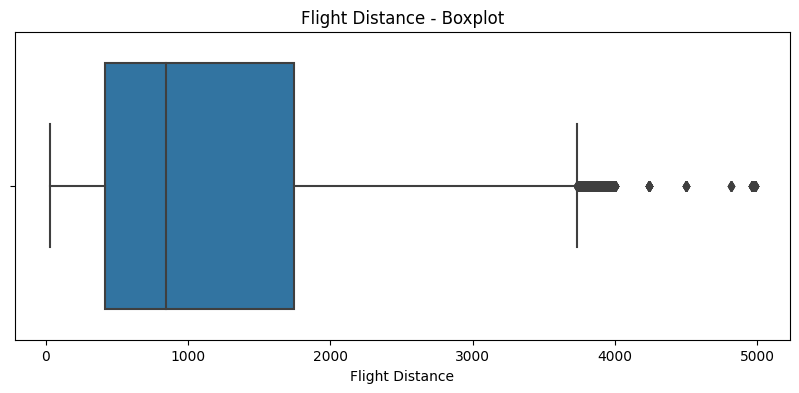

In [21]:

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Flight Distance'])
plt.title("Flight Distance - Boxplot")
plt.show()


Bu değerler, istatistiksel olarak norm aralığın dışında kalmakta ve uçuşların az sayıda çok uzun mesafeli rotalar içerdiğini göstermektedir. Bu uç değerlerin olası nedenleri arasında:

* Kıtalar arası uçuşlar
* Çok az sayıda gerçekleştirilen özel rotalar
yer alabilir.

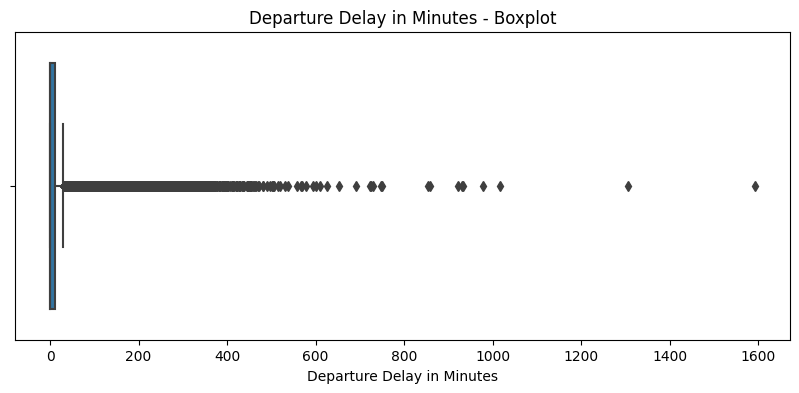

In [29]:

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['Departure Delay in Minutes'])
plt.title("Departure Delay in Minutes - Boxplot")
plt.show()


Uçuşların kalkış gecikmelerinin dağılımını ve olası aykırı değerleri göstermektedir. Gecikme sürelerinin büyük çoğunluğu 0 ile 200 dakika arasında yoğunlaşmakta, ancak özellikle 400 dakikanın üzerinde çok sayıda aykırı değer (outlier) tespit edilmiştir.

Gözlemlenen bu aykırı değerler, olağan dışı durumları (örneğin teknik arızalar, hava muhalefeti, iptal edilip tekrar planlanan uçuşlar) temsil ediyor olabilir. Bu uç değerler, veri setinin çarpıklığını artırmakta ve ortalama gibi merkezi eğilim ölçülerinin yanıltıcı olmasına neden olabilir.